# Tratamento dos dados

### Imports

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from scipy import stats
import random
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, KFold

### Filtragem dos dados


In [57]:
file_path = r'.\dataset _original _rodada _1 _(vinho _branco) _FieldSpec.xlsx'
#file_path = r'C:\Users\lenau\Documents\GitHub\field_spec_data_tests\dataset_original_rodada_1_(vinho_branco)_FieldSpec.xlsx'

#importando o arquivo e guardando na variável file_path

fs_df = pd.read_excel(file_path)
#o pandas como pd lê o arquivo em file_path e guarda na variavel fs_df

#fs_df mostra o arquivo completo

fs_df.tail()

,Wavelength,Date,Tank,TA,AV,AT,pH,MV,AR,350,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
37,amostra_00038.asd.txt,2022-11-09,110,11.5,0.27,5.10,3.8,995,1.8,1.503835,...,2.656636,2.550109,2.501081,2.471406,2.529202,2.619732,2.639313,2.598884,2.575628,2.642086
38,amostra_00039.asd.txt,2022-11-09,110,11.5,0.27,5.10,3.8,995,1.8,1.664785,...,2.797181,2.758138,3.052151,3.213511,3.071573,3.178512,3.150150,3.103570,3.097533,3.154010
39,amostra_00040.asd.txt,2022-11-09,110,11.5,0.29,5.17,3.8,995,1.8,1.863774,...,3.127336,2.887030,2.822618,2.870859,2.779617,2.837596,2.990740,2.869202,2.732040,2.635091
40,amostra_00041.asd.txt,2022-11-09,110,11.5,0.29,5.17,3.8,995,1.8,1.670042,...,2.718212,2.633415,2.549066,2.544755,2.590426,2.767958,3.169085,3.571220,3.605718,4.104746
41,amostra_00042.asd.txt,2022-11-09,110,11.5,0.27,5.10,3.8,995,1.8,1.695179,...,2.745712,2.794190,2.618852,2.728730,2.796776,2.743646,3.205304,3.058834,2.688029,2.637008


In [58]:
# Supondo que fs_df já esteja definido
# params contém as colunas específicas que queremos
params = ['TA', 'AV', 'AT', 'pH', 'MV', 'AR']
# Seleciona as colunas especificadas em params e remove linhas com valores NaN
fs_params = fs_df[params].dropna()
# Seleciona as colunas de interesse (da coluna 39 até a coluna 2130)
#fs_vars = fs_df.iloc[:, 39:2130].columns.to_list()
fs_vars = fs_df.iloc[:, 9:2160].columns.to_list()
# Concatena as colunas de params e fs_vars
fs = fs_vars
# Seleciona as colunas especificadas em fs do dataframe fs_df e remove linhas com valores NaN
dados_wl = fs_df[fs].dropna()
# Exibe o dataframe resultante
#print(fs_df_selected)
# Cria um array de comprimentos de onda
wl = np.arange(350, 2501, 1)
# Exibe os comprimentos de onda
print(wl)
#dados_wl
#fs
dados_wl = fs_df[fs_vars]

[ 350  351  352 ... 2498 2499 2500]


# Pré-processamento dos dados


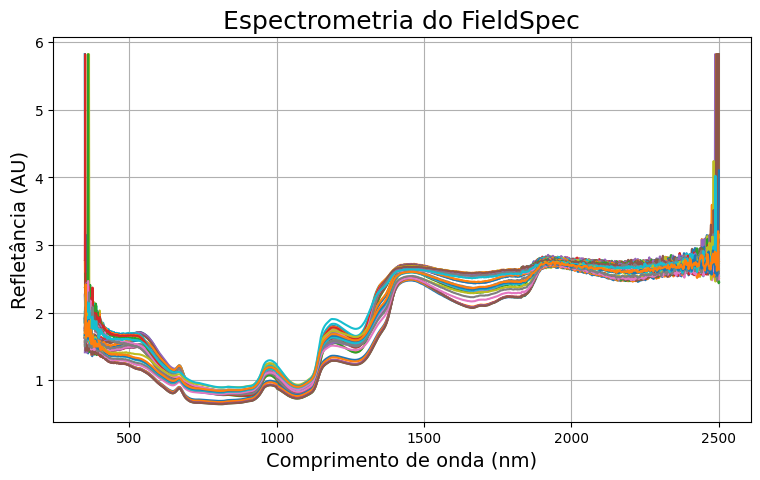

In [59]:

# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(9,5))
# Plota os dados contidos no DataFrame df em relação aos valores do eixo x x_axis_fs
plt.plot(wl, dados_wl.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Espectrometria do FieldSpec" com tamanho de fonte 18
plt.title("Espectrometria do FieldSpec", size=18)
# Ativa a grade no gráfico
plt.grid("on")
# Exibe o gráfico
plt.show()


### Savitzky-Golay

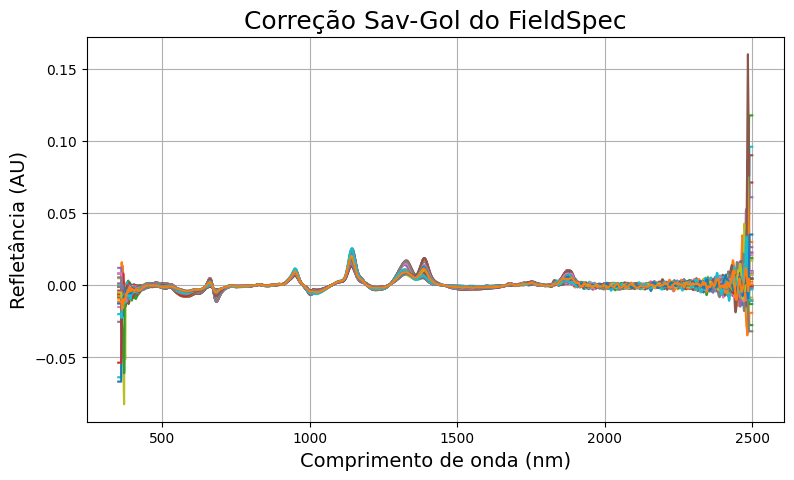

In [60]:
# Aplica a função savgol_filter aos dados x
# para calcular a primeira derivada dos dados
# utilizando uma janela de tamanho 20 e um polinômio de ordem 1
sav_gol = savgol_filter(dados_wl, 21, polyorder=1, deriv=1) 
# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(9,5))
# Plota os dados contidos no DataFrame df em relação aos valores do eixo x x_axis_fs
plt.plot(wl, sav_gol.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Espectrometria do FieldSpec" com tamanho de fonte 18
plt.title("Correção Sav-Gol do FieldSpec", size=18)
# Ativa a grade no gráfico
plt.grid("on")
# Exibe o gráfico
plt.show()


In [61]:
# Criando um DataFrame a partir dos dados
df_savgol = pd.DataFrame(sav_gol)
# Nome do arquivo Excel a ser exportado
filename = 'dataset_savgol_ordem_1.xlsx'
# Exportando o DataFrame para um arquivo Excel, excluindo o índice das linhas
df_savgol.to_excel(filename, index=False)
# Imprimindo uma mensagem indicando que o conjunto de dados foi exportado com sucesso para o Excel
print("Dataset exported successfully to Excel.")

Dataset exported successfully to Excel.


### MSC

In [62]:
def apply_msc(df):
    """
    Aplica a correção multiplicativa de espalhamento (MSC) aos dados espectroscópicos.
    Parâmetros:
    df : pandas.DataFrame
        DataFrame contendo os dados espectroscópicos. As linhas devem ser amostras e as colunas devem ser comprimentos de onda.
    
    Retorna:
    pandas.DataFrame
        DataFrame com os dados corrigidos pelo MSC.
    """
    # Calcula o espectro médio de referência
    mean_spectrum = df.mean(axis=0)
    
    # Lista para armazenar os espectros corrigidos
    corrected_spectra = []
    
    # Aplica MSC a cada espectro individualmente
    for i in range(df.shape[0]):
        spectrum = df.iloc[i, :]
        
        # Ajusta uma linha reta ao espectro médio de referência
        slope, intercept = np.polyfit(mean_spectrum, spectrum, 1)
        
        # Corrige o espectro
        corrected_spectrum = (spectrum - intercept) / slope
        corrected_spectra.append(corrected_spectrum)
    
    # Converte a lista de espectros corrigidos de volta para um DataFrame
    corrected_df = pd.DataFrame(corrected_spectra, columns=df.columns)
    
    return corrected_df

dados_wl
df_msc = apply_msc(dados_wl)
#df_msc

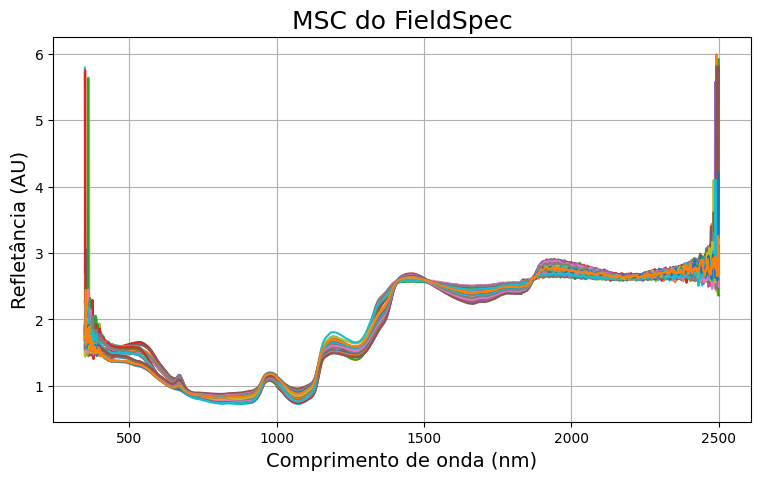

In [63]:
import matplotlib.pyplot as plt
# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(9, 5))
# Plota os dados corrigidos
plt.plot(wl, df_msc.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Espectrometria do FieldSpec" com tamanho de fonte 18
plt.title("MSC do FieldSpec", size=18)
# Ativa a grade no gráfico
plt.grid("on")
# Exibe o gráfico
plt.show()

In [64]:
# Criando um DataFrame a partir dos dados
df = pd.DataFrame(df_msc)
# Nome do arquivo Excel a ser exportado
filename = 'dataset_msc.xlsx'
# Exportando o DataFrame para um arquivo Excel, excluindo o índice das linhas
df.to_excel(filename, index=False)
# Imprimindo uma mensagem indicando que o conjunto de dados foi exportado com sucesso para o Excel
print("Dataset exported successfully to Excel.")

Dataset exported successfully to Excel.


### SNV

In [65]:
#dados_wl

In [66]:
def snv(input_data):
    """
    Aplica a transformação Standard Normal Variate (SNV) aos dados de entrada.
    
    Parameters:
    input_data (numpy.ndarray): Dados de entrada, onde cada linha é um espectro.
    
    Returns:
    numpy.ndarray: Dados transformados após a aplicação do SNV.
    """
    # Calcular a média de cada linha
    mean = np.mean(input_data, axis=1, keepdims=True)
    # Calcular o desvio padrão de cada linha
    std_dev = np.std(input_data, axis=1, keepdims=True)
    # Aplicar a transformação SNV
    snv_data = (input_data - mean) / std_dev
    return snv_data

# Exemplo de DataFrame (substitua pelo seu DataFrame real)
dados_wl

# Certifique-se de que os dados são numéricos
if not np.issubdtype(dados_wl.values.dtype, np.number):
    raise ValueError("Todos os dados de entrada devem ser numéricos.")

# Aplicando a transformação SNV ao DataFrame
df_snv = snv(dados_wl.values)
df_snv = pd.DataFrame(df_snv, columns=wl)

#data_snv_fs


In [67]:
# Defina o nome do arquivo onde deseja salvar os dados corrigidos
filename = "dataset_snv.xlsx"

# Salve os dados corrigidos em um novo arquivo Excel
df_snv.to_excel(filename, index=False)

# Exiba uma mensagem indicando que o arquivo foi salvo com sucesso
print(f"Dados corrigidos salvos com sucesso em {filename}")

Dados corrigidos salvos com sucesso em dataset_snv.xlsx


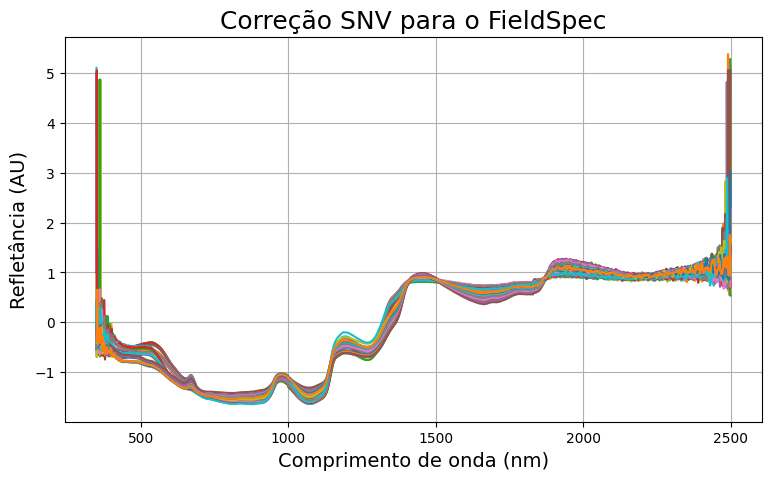

In [68]:
# Cria uma figura para o gráfico com tamanho 12x9 polegadas
plt.figure(figsize=(9, 5))
# Plota os dados corrigidos SNV em relação ao eixo x wl
plt.plot(wl, df_snv.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" e o tamanho da fonte como 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" e o tamanho da fonte como 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Correção SNV para o FieldSpec" e o tamanho da fonte como 18
plt.title("Correção SNV para o FieldSpec", size=18)
# Adiciona uma grade ao gráfico
plt.grid("on")
# Exibe o gráfico
plt.show()

# Divisão de dados

In [69]:
# Lista de conjuntos de dados espectrais (X) e atributos de qualidade (Y) para cada dispositivo
Y = fs_df[['TA', 'AV', 'AT', 'MV', 'AR']]
X = dados_wl
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X, Y, test_size=0.3, random_state = 0)


#### Testes com dados brutos ----------------------------------------------------------------

In [70]:
pls_fs = PLSRegression(n_components=6)
pls_fs.fit(X_train_fs, y_train_fs)

y_pred_fs = pls_fs.predict(X_test_fs)
y_cal_fs = pls_fs.predict(X_train_fs)

r2_cal_fs = r2_score(y_train_fs, y_cal_fs)
r2_pred_fs = r2_score(y_test_fs, y_pred_fs)

rmse_cal_fs = np.sqrt(mean_squared_error(y_train_fs, y_cal_fs))
rmse_pred_fs = np.sqrt(mean_squared_error(y_test_fs, y_pred_fs))

print(f' ---PLSR--- \n\n R²calibração: {r2_cal_fs: .4f} \
       \n R²predição: {r2_pred_fs: .4f} \
       \n RMSEcalibração: {rmse_cal_fs: .4f} \
       \n RMSEpredição: {rmse_pred_fs: .4f} \n\n')

 ---PLSR--- 

 R²calibração:  0.9807        
 R²predição:  0.7387        
 RMSEcalibração:  4.1892        
 RMSEpredição:  10.6833 




In [71]:
rfr_fs = RandomForestRegressor()
rfr_fs.fit(X_train_fs, y_train_fs)

y_pred_fs = rfr_fs.predict(X_test_fs)
y_cal_fs = rfr_fs.predict(X_train_fs)

r2_cal_fs = r2_score(y_train_fs, y_cal_fs)
r2_pred_fs = r2_score(y_test_fs, y_pred_fs)

rmse_cal_fs = np.sqrt(mean_squared_error(y_train_fs, y_cal_fs))
rmse_pred_fs = np.sqrt(mean_squared_error(y_test_fs, y_pred_fs))

print(f' ---Random Forest Regressor--- \n\n R²calibração: {r2_cal_fs: .4f} \
       \n R²predição: {r2_pred_fs: .4f} \
       \n RMSEcalibração: {rmse_cal_fs: .4f} \
       \n RMSEpredição: {rmse_pred_fs: .4f} \n\n')

 ---Random Forest Regressor--- 

 R²calibração:  0.9845        
 R²predição:  0.5384        
 RMSEcalibração:  2.2758        
 RMSEpredição:  21.4380 




In [72]:
mlp_fs = MLPRegressor(max_iter=600, solver="adam", learning_rate_init= 0.01)
mlp_fs.fit(X_train_fs, y_train_fs)

y_pred_fs = mlp_fs.predict(X_test_fs)
y_cal_fs = mlp_fs.predict(X_train_fs)

r2_cal_fs = r2_score(y_train_fs, y_cal_fs)
r2_pred_fs = r2_score(y_test_fs, y_pred_fs)

rmse_cal_fs = np.sqrt(mean_squared_error(y_train_fs, y_cal_fs))
rmse_pred_fs = np.sqrt(mean_squared_error(y_test_fs, y_pred_fs))

print(f' ---MLP Regressor--- \n\n R²calibração: {r2_cal_fs: .4f} \
       \n R²predição: {r2_pred_fs: .4f} \
       \n RMSEcalibração: {rmse_cal_fs: .4f} \
       \n RMSEpredição: {rmse_pred_fs: .4f} \n\n')

 ---MLP Regressor--- 

 R²calibração: -604.2571        
 R²predição: -692.9072        
 RMSEcalibração:  52.3086        
 RMSEpredição:  54.0774 




In [73]:
# Dividir os dados em conjuntos de treino e teste
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X, Y['TA'], test_size=0.3, random_state=0)

# Certifique-se de que y_train_fs e y_test_fs sejam arrays 1D
y_train_fs = y_train_fs.values.ravel()
y_test_fs = y_test_fs.values.ravel()

# Cria e ajusta o modelo SVR
svm_rbf_fs = SVR(kernel='poly')
svm_rbf_fs.fit(X_train_fs, y_train_fs)

# Faz previsões
y_pred_fs = svm_rbf_fs.predict(X_test_fs)
y_cal_fs = svm_rbf_fs.predict(X_train_fs)

# Calcula os resultados
r2_cal_fs = r2_score(y_train_fs, y_cal_fs)
r2_pred_fs = r2_score(y_test_fs, y_pred_fs)

rmse_cal_fs = np.sqrt(mean_squared_error(y_train_fs, y_cal_fs))
rmse_pred_fs = np.sqrt(mean_squared_error(y_test_fs, y_pred_fs))

print(f' ---Support Vector Machines--- \n\n R² calibração: {r2_cal_fs:.4f} \
       \n R² predição: {r2_pred_fs:.4f} \
       \n RMSE calibração: {rmse_cal_fs:.4f} \
       \n RMSE predição: {rmse_pred_fs:.4f} \n\n')


 ---Support Vector Machines--- 

 R² calibração: 0.9778        
 R² predição: 0.7427        
 RMSE calibração: 0.2012        
 RMSE predição: 0.5281 




# Aplicação do modelo PLS

### PSL (k-fold e cv)

In [74]:
def optimise_pls_cv(X, Y, n_comp, random_state=0):
    '''
    Executa o PLS incluindo um número variável de componentes, até n_comp,
    e calcula MSE, RMSE, R^2 e RPD para calibração e validação.
    '''
    # Inicializa listas para armazenar os resultados
    mse = []
    r2_calib = []
    r2_cv = []
    rmse_calib = []
    rmse_cv = []
    rpd_calib = []
    rpd_cv = []
    bias = []
    results = []

    # Itera sobre cada coluna em Y
    for col in Y.columns:
        y = Y[col]  # Seleciona a coluna atual de Y

        mse_col = []  # Lista para armazenar os MSEs para a coluna atual
        component = np.arange(1, n_comp)  # Número de componentes a serem testados

        # Itera sobre cada número de componentes
        for i in component:
            pls = PLSRegression(n_components=i)  # Cria o modelo PLS com i componentes

            # Realiza a predição com validação cruzada
            y_cv = cross_val_predict(pls, X, y, cv=10)

            # Calcula o MSE para a validação cruzada
            mse_val = mean_squared_error(y, y_cv)
            mse_col.append(mse_val)

        # Encontra o número de componentes que minimiza o MSE
        msemin = np.argmin(mse_col)

        # Define o modelo PLS com o número ótimo de componentes
        pls_opt = PLSRegression(n_components=msemin + 1)

        # Ajusta o modelo ao conjunto de dados completo
        pls_opt.fit(X, y)
        y_c = pls_opt.predict(X)

        # Realiza a predição com validação cruzada usando o modelo otimizado
        y_cv = cross_val_predict(pls_opt, X, y, cv=10)

        # Calcula o R^2 para calibração e validação
        r2_calib_val = r2_score(y, y_c)
        r2_cv_val = r2_score(y, y_cv)

        # Calcula o MSE para calibração e validação
        mse_calib_val = mean_squared_error(y, y_c)
        mse_cv_val = mean_squared_error(y, y_cv)

        # Calcula o RMSE para calibração e validação
        rmse_calib_val = np.sqrt(mse_calib_val)
        rmse_cv_val = np.sqrt(mse_cv_val)

        # Calcula o RPD para calibração e validação
        rpd_calib_val = np.std(y) / rmse_calib_val
        rpd_cv_val = np.std(y) / rmse_cv_val
        
        # Calcula o bias para calibração e validação
        bias_calc = np.mean(y_c - y_cv)

        # Armazena os resultados em um dicionário e adiciona à lista de resultados
        results.append({
            'Column': col,
            'R2_calib': r2_calib_val,
            'R2_cv': r2_cv_val,
            'MSE_calib': mse_calib_val,
            'MSE_cv': mse_cv_val,
            'RMSE_calib': rmse_calib_val,
            'RMSE_cv': rmse_cv_val,
            'RPD_calib': rpd_calib_val,
            'RPD_cv': rpd_cv_val,
            'Bias': bias_calc
        })


    print("\n")

# Cria um DataFrame com os resultados
    results_df = pd.DataFrame(results, columns=['Column', 'R2_calib', 'R2_cv', 'MSE_calib', 'MSE_cv', 'RMSE_calib', 'RMSE_cv', 'RPD_calib', 'RPD_cv', 'Bias'])

    return results_df


In [75]:
def optimise_pls_cv(X, Y, n_comp, test_size=0.3, random_state=0):
    '''
    Executa o PLS incluindo um número variável de componentes, até n_comp,
    e calcula MSE, RMSE, R^2, RPD e bias usando divisão 70-30.
    '''
    # Lista para armazenar os resultados
    results = []

    # Divisão dos dados em conjuntos de treino (70%) e teste (30%)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

    # Itera sobre cada coluna em Y
    for col in Y.columns:
        mse_fold = []  # Lista para armazenar os MSEs para cada número de componentes

        # Itera sobre cada número de componentes de 1 até n_comp-1
        for i in range(1, n_comp+1):
            pls = PLSRegression(n_components=i)  # Cria o modelo PLS com i componentes

            # Ajusta o modelo PLS ao conjunto de treino
            pls.fit(X_train, Y_train[col])

            # Prediz o conjunto de teste
            Y_pred = pls.predict(X_test)

            # Calcula o MSE para o conjunto de teste
            mse_fold.append(mean_squared_error(Y_test[col], Y_pred))

        mse_cv = np.array(mse_fold)  # Converte a lista de MSEs para um array numpy
        msemin = np.argmin(mse_cv)  # Encontra o índice do menor MSE

        # Define o modelo PLS com o número ótimo de componentes (aquele que minimiza o MSE)
        pls_opt = PLSRegression(n_components=msemin)

        # Ajusta o modelo ao conjunto de dados completo
        pls_opt.fit(X, Y[col])
        Y_c = pls_opt.predict(X)

        # Calcula o R^2 para calibração (ajuste ao conjunto completo)
        score_c = r2_score(Y[col], Y_c)

        # Calcula o MSE para calibração
        mse_c = mean_squared_error(Y[col], Y_c)

        # Calcula o RMSE para calibração
        rmse_c = np.sqrt(mse_c)

        # Calcula o R^2 para validação (conjunto de teste)
        score_cv = r2_score(Y_test[col], Y_pred)

        # Calcula o MSE para validação
        mse_cv = mean_squared_error(Y_test[col], Y_pred)

        # Calcula o RMSE para validação
        rmse_cv = np.sqrt(mse_cv)

        # Calcula o RPD para calibração e validação
        rpd_calib = np.std(Y[col]) / rmse_c
        rpd_cv = np.std(Y_test[col]) / rmse_cv

        # Calcula o bias
        bias = np.mean(Y_pred - Y_test[col])

        # Armazena os resultados em um dicionário e adiciona à lista de resultados
        results.append({
            'Column': col,
            'R2_calib': score_c,
            'R2_cv': score_cv,
            'MSE_calib': mse_c,
            'MSE_cv': mse_cv,
            'RMSE_calib': rmse_c,
            'RMSE_cv': rmse_cv,
            'RPD_calib': rpd_calib,
            'RPD_cv': rpd_cv,
            'Bias': bias
        })

    # Converte a lista de resultados para um DataFrame pandas e o retorna
    return pd.DataFrame(results)

# Supondo que você tenha X e Y definidos
# Aplica a função optimise_pls_cv a diferentes conjuntos de dados
results_pls_raw = optimise_pls_cv(dados_wl, Y, n_comp=6, random_state=0)
results_pls_msc = optimise_pls_cv(df_msc, Y, n_comp=6, random_state=0)
results_pls_snv = optimise_pls_cv(df_snv, Y, n_comp=6, random_state=0)
results_pls_sg = optimise_pls_cv(sav_gol, Y, n_comp=6, random_state=0)


### PSL - RAW

In [76]:
raw_psl = optimise_pls_cv(dados_wl,Y,5)
raw_psl

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv,RPD_calib,RPD_cv,Bias
0,TA,0.663353,0.514899,0.545652,0.525815,0.738682,0.725131,1.723506,1.435768,-0.098730
1,AV,0.399966,0.788792,0.005677,0.001665,0.075343,0.040803,1.290958,2.175931,-0.021242
2,AT,0.794208,0.479739,0.149917,0.291006,0.387191,0.539450,2.204375,1.386402,-0.199355
3,MV,0.979184,0.927605,26.677356,72.778919,5.165013,8.531056,6.931098,3.716597,2.192651
4,AR,0.982572,0.931289,117.791805,357.961774,10.853193,18.919878,7.574808,3.814935,5.107825


In [77]:
results_pls_raw


,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv,RPD_calib,RPD_cv,Bias
0,TA,0.663353,0.440749,0.545652,0.606189,0.738682,0.778582,1.723506,1.337201,-0.117822
1,AV,0.399966,0.755473,0.005677,0.001928,0.075343,0.043904,1.290958,2.022260,-0.023825
2,AT,0.794208,0.488699,0.149917,0.285994,0.387191,0.534784,2.204375,1.398498,-0.169380
3,MV,0.992703,0.939921,9.351844,60.397361,3.058078,7.771574,11.706439,4.079803,2.204400
4,AR,0.994054,0.937979,40.189831,323.110910,6.339545,17.975286,12.967942,4.015407,5.279812


### PSL - MSC

In [78]:
msc_psl = optimise_pls_cv(df_msc,Y,5)
msc_psl

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv,RPD_calib,RPD_cv,Bias
0,TA,0.913777,0.611932,0.139754,0.420638,0.373836,0.648566,3.405565,1.605263,-0.157875
1,AV,0.499655,0.748909,0.004733,0.001979,0.068800,0.044489,1.413726,1.995652,-0.021003
2,AT,0.654565,0.329089,0.251645,0.375271,0.501642,0.612594,1.701441,1.220865,-0.249383
3,MV,0.516906,0.921048,619.125425,79.370815,24.882231,8.909030,1.438746,3.558917,4.389851
4,AR,0.564404,0.906047,2944.031115,489.467072,54.258927,22.123903,1.515158,3.262449,10.171877


In [79]:
results_pls_msc

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv,RPD_calib,RPD_cv,Bias
0,TA,0.913777,0.605897,0.139754,0.427181,0.373836,0.653590,3.405565,1.592924,-0.229624
1,AV,0.499655,0.776473,0.004733,0.001762,0.068800,0.041977,1.413726,2.115120,-0.018811
2,AT,0.654565,0.430711,0.251645,0.318429,0.501642,0.564295,1.701441,1.325360,-0.238784
3,MV,0.516906,0.943183,619.125425,57.118293,24.882231,7.557664,1.438746,4.195277,3.402157
4,AR,0.564404,0.935954,2944.031115,333.658990,54.258927,18.266335,1.515158,3.951427,7.631390


### PSL - SNV

In [80]:
snv_psl = optimise_pls_cv(df_snv,Y,5)
snv_psl

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv,RPD_calib,RPD_cv,Bias
0,TA,0.910360,0.566052,0.145292,0.470369,0.381172,0.685835,3.340026,1.518033,-0.191986
1,AV,0.529541,0.742669,0.004451,0.002028,0.066713,0.045039,1.457938,1.971307,-0.021094
2,AT,0.663753,0.369723,0.244951,0.352543,0.494926,0.593753,1.724531,1.259605,-0.258055
3,MV,0.539789,0.917045,589.798997,83.394683,24.285778,9.132069,1.474081,3.471995,4.543962
4,AR,0.589316,0.900126,2775.659838,520.310939,52.684531,22.810325,1.560436,3.164273,10.495868


In [81]:
results_pls_snv

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv,RPD_calib,RPD_cv,Bias
0,TA,0.927846,0.580990,0.116950,0.454177,0.341979,0.673927,3.722811,1.544856,-0.252281
1,AV,0.529541,0.769697,0.004451,0.001815,0.066713,0.042608,1.457938,2.083774,-0.019840
2,AT,0.663753,0.421923,0.244951,0.323345,0.494926,0.568634,1.724531,1.315247,-0.236433
3,MV,0.539789,0.939076,589.798997,61.247239,24.285778,7.826062,1.474081,4.051399,3.656913
4,AR,0.589316,0.933618,2775.659838,345.827343,52.684531,18.596434,1.560436,3.881287,8.108268


### PSL - SAVGOL

In [82]:
savgol_psl = optimise_pls_cv(df_savgol,Y,5)
savgol_psl

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv,RPD_calib,RPD_cv,Bias
0,TA,0.916919,0.554250,0.134662,0.483162,0.366963,0.695098,3.469355,1.497802,-0.299279
1,AV,0.832478,0.756164,0.001585,0.001922,0.039810,0.043842,2.443230,2.025121,-0.023749
2,AT,0.786402,0.530222,0.155604,0.262768,0.394466,0.512609,2.163720,1.458995,-0.116756
3,MV,0.994340,0.968511,7.253421,31.656402,2.693218,5.626402,13.292356,5.635305,2.886283
4,AR,0.996180,0.961183,25.820246,202.224361,5.081363,14.220561,16.178900,5.075615,6.460687


In [83]:
results_pls_sg

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv,RPD_calib,RPD_cv,Bias
0,TA,0.916919,0.541480,0.134662,0.497004,0.366963,0.704985,3.469355,1.476797,-0.320624
1,AV,0.832478,0.733217,0.001585,0.002103,0.039810,0.045859,2.443230,1.936069,-0.025370
2,AT,0.786402,0.573521,0.155604,0.238549,0.394466,0.488415,2.163720,1.531268,-0.096459
3,MV,0.994340,0.968201,7.253421,31.967400,2.693218,5.653972,13.292356,5.607827,2.951542
4,AR,0.996180,0.961028,25.820246,203.033252,5.081363,14.248974,16.178900,5.065494,6.704173


# Aplicação do modelo RF

### RF

In [84]:
def random_forest_regression(X, Y):
    # Dividindo os dados em conjuntos de treinamento e teste
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Criando listas para armazenar os resultados de calibração e validação
    resultados_calibracao = []
    resultados_validacao = []

    # Loop sobre cada atributo
    for atributo in Y.columns:
        # Treinando o modelo
        model = RandomForestRegressor()
        model.fit(X_train, Y_train[atributo])

        # Fazendo previsões nos dados de calibração
        predictions_calibracao = model.predict(X_train)

        # Calculando as métricas para os dados de calibração
        r2_calibracao = r2_score(Y_train[atributo], predictions_calibracao)
        rmse_calibracao = np.sqrt(mean_squared_error(Y_train[atributo], predictions_calibracao))
        rpd_calibracao = np.std(Y_train[atributo]) / rmse_calibracao
        bias_calibracao = np.mean(predictions_calibracao) - np.mean(Y_train[atributo])

        # Armazenando os resultados de calibração na lista
        resultados_calibracao.append({'Atributo': atributo, 'R²': r2_calibracao, 'RPD': rpd_calibracao, 'RMSE': rmse_calibracao, 'Bias': bias_calibracao})

        # Fazendo previsões nos dados de validação
        predictions_validacao = model.predict(X_test)

        # Calculando as métricas para os dados de validação
        r2_validacao = r2_score(Y_test[atributo], predictions_validacao)
        rmse_validacao = np.sqrt(mean_squared_error(Y_test[atributo], predictions_validacao))
        rpd_validacao = np.std(Y_test[atributo]) / rmse_validacao
        bias_validacao = np.mean(predictions_validacao) - np.mean(Y_test[atributo])

        # Armazenando os resultados de validação na lista
        resultados_validacao.append({'Atributo': atributo, 'R²': r2_validacao, 'RPD': rpd_validacao, 'RMSE': rmse_validacao, 'Bias': bias_validacao})

    # Convertendo as listas de dicionários em DataFrames
    resultados_calibracao_df = pd.DataFrame(resultados_calibracao)
    resultados_validacao_df = pd.DataFrame(resultados_validacao)

    return resultados_calibracao_df, resultados_validacao_df

# Testando a função com os dataframes
results_rf_raw_calibracao, results_rf_raw_validacao = random_forest_regression(dados_wl, Y)
results_rf_msc_calibracao, results_rf_msc_validacao = random_forest_regression(df_msc, Y)
results_rf_snv_calibracao, results_rf_snv_validacao = random_forest_regression(df_snv, Y)
results_rf_sg_calibracao, results_rf_sg_validacao = random_forest_regression(sav_gol, Y)

# Mesclando os resultados de calibração e validação em um único DataFrame
results_rf_raw = pd.concat([results_rf_raw_calibracao, results_rf_raw_validacao], axis=1, keys=['Calibração', 'Validação'])
results_rf_msc = pd.concat([results_rf_msc_calibracao, results_rf_msc_validacao], axis=1, keys=['Calibração', 'Validação'])
results_rf_snv = pd.concat([results_rf_snv_calibracao, results_rf_snv_validacao], axis=1, keys=['Calibração', 'Validação'])
results_rf_sg = pd.concat([results_rf_sg_calibracao, results_rf_sg_validacao], axis=1, keys=['Calibração', 'Validação'])



In [85]:
def rfr(X, Y):
    '''
    Executa o Random Forest Regressor e calcula métricas de avaliação.
    '''
    results = []

    # Itera sobre cada coluna em Y
    for col in Y.columns:
        y = Y[col]  # Seleciona a coluna atual de Y
        
        # Inicializa o modelo de Random Forest Regressor
        rf = RandomForestRegressor(n_estimators=50, max_depth=10)

        # Realiza a predição com validação cruzada
        y_cv_pred = cross_val_predict(rf, X, y, cv=10)

        # Ajusta o modelo aos dados completos
        rf.fit(X, y)
        y_train_pred = rf.predict(X)

        # Calcula as métricas de validação cruzada
        mse_cv = mean_squared_error(y, y_cv_pred)
        rmse_cv = np.sqrt(mse_cv)
        r2_cv = r2_score(y, y_cv_pred)
        rpd_cv = np.std(y) / rmse_cv
        bias_cv = np.mean(y - y_cv_pred)

        # Calcula as métricas de treinamento
        mse_train = mean_squared_error(y, y_train_pred)
        rmse_train = np.sqrt(mse_train)
        r2_train = r2_score(y, y_train_pred)
        rpd_train = np.std(y) / rmse_train
        bias_train = np.mean(y - y_train_pred)

        # Armazena os resultados em um dicionário e adiciona à lista de resultados
        results.append({
            'Column': col,
            'MSE_train': mse_train,
            'RMSE_train': rmse_train,
            'R2_train': r2_train,
            'RPD_train': rpd_train,
            'Bias_train': bias_train,
            'MSE_cv': mse_cv,
            'RMSE_cv': rmse_cv,
            'R2_cv': r2_cv,
            'RPD_cv': rpd_cv,
            'Bias_cv': bias_cv
        })

    # Cria um DataFrame com os resultados
    results_df = pd.DataFrame(results, columns=['Column', 'MSE_train', 'RMSE_train', 'R2_train', 'RPD_train', 'Bias_train',
                                                'MSE_cv', 'RMSE_cv', 'R2_cv', 'RPD_cv', 'Bias_cv'])

    return results_df


### Resultados

In [86]:
raw_rf = rfr(dados_wl,Y)
raw_rf
#Verificar se há overfitting: Compare o desempenho do modelo nos conjuntos de treinamento e teste. Se o desempenho for muito melhor nos dados de treinamento do que nos de teste, pode haver overfitting.

,Column,MSE_train,RMSE_train,R2_train,RPD_train,Bias_train,MSE_cv,RMSE_cv,R2_cv,RPD_cv,Bias_cv
0,TA,0.040162,0.200406,0.975221,6.352733,-0.022114,0.540902,0.735461,0.666284,1.731057,0.023576
1,AV,0.000235,0.015326,0.975170,6.346203,0.001600,0.001810,0.042539,0.808721,2.286476,0.004457
2,AT,0.035376,0.188086,0.951439,4.537898,-0.000652,0.470660,0.686046,0.353922,1.244106,0.030862
3,MV,21.331876,4.618644,0.983355,7.751021,-0.956667,264.645133,16.267917,0.793501,2.200602,-1.231905
4,AR,150.599079,12.271882,0.977717,6.699124,-1.135633,1184.192448,34.412097,0.824788,2.389010,-5.586433


In [87]:
print('RAW')
results_rf_raw

RAW


Calibração                                          Validação            \
    Atributo        R²        RPD      RMSE      Bias  Atributo        R²   
0         TA  0.973551   6.148892  0.225199 -0.005607        TA  0.813671   
1         AV  0.984128   7.937606  0.012108 -0.000548        AV  0.749935   
2         AT  0.923985   3.627035  0.237030 -0.007410        AT  0.724069   
3         MV  0.991822  11.058003  3.216662 -0.214483        MV  0.728596   
4         AR  0.992053  11.217447  7.257117 -0.722521        AR  0.782128   

                                  
        RPD       RMSE      Bias  
0  2.316645   0.414979 -0.091869  
1  1.999741   0.049751  0.001323  
2  1.903706   0.439802  0.001631  
3  1.919515  18.863935  1.629231  
4  2.142392  39.101064  7.527508

In [88]:
msc_rf = rfr(df_msc,Y)
msc_rf

,Column,MSE_train,RMSE_train,R2_train,RPD_train,Bias_train,MSE_cv,RMSE_cv,R2_cv,RPD_cv,Bias_cv
0,TA,0.017194,0.131125,0.989392,9.709242,0.009376,0.594726,0.771185,0.633077,1.650868,0.104533
1,AV,0.000070,0.008370,0.992595,11.620865,0.000267,0.000715,0.026736,0.924443,3.637990,0.000843
2,AT,0.029496,0.171744,0.959510,4.969682,-0.002333,0.222521,0.471721,0.694544,1.809363,-0.036957
3,MV,1.265686,1.125027,0.999012,31.820755,-0.090000,16.891571,4.109936,0.986820,8.710406,-0.514762
4,AR,4.446283,2.108621,0.999342,38.987970,0.117143,160.464033,12.667440,0.976258,6.489934,-2.366524


In [89]:
print('MSC')
results_rf_msc

MSC


Calibração                                          Validação            \
    Atributo        R²        RPD      RMSE      Bias  Atributo        R²   
0         TA  0.976960   6.588134  0.210185  0.001776        TA  0.735576   
1         AV  0.988359   9.268481  0.010370  0.000224        AV  0.925025   
2         AT  0.963883   5.261892  0.163385  0.016938        AT  0.802297   
3         MV  0.998157  23.294596  1.526958  0.079310        MV  0.971384   
4         AR  0.990682  10.359223  7.858343  0.585269        AR  0.965153   

                                  
        RPD       RMSE      Bias  
0  1.944685   0.494352 -0.280338  
1  3.652102   0.027242  0.001215  
2  2.249022   0.372274  0.097977  
3  5.911470   6.125315  2.753077  
4  5.356919  15.637683  0.071777

In [90]:
snv_rf = rfr(df_snv,Y)
snv_rf

,Column,MSE_train,RMSE_train,R2_train,RPD_train,Bias_train,MSE_cv,RMSE_cv,R2_cv,RPD_cv,Bias_cv
0,TA,0.029085,0.170544,0.982055,7.465066,-0.021652,0.450879,0.671475,0.721825,1.896010,0.068548
1,AV,0.000103,0.010126,0.989160,9.604928,0.000919,0.000735,0.027107,0.922327,3.588115,0.002252
2,AT,0.033744,0.183694,0.953680,4.646391,0.009871,0.287112,0.535828,0.605879,1.592888,-0.015967
3,MV,5.128495,2.264618,0.995998,15.808055,-0.458095,28.972486,5.382610,0.977393,6.650902,-1.092857
4,AR,40.609187,6.372534,0.993992,12.900811,-1.034295,209.718746,14.481669,0.968970,5.676891,-2.621267


In [91]:
print('SNV')
results_rf_snv

SNV


Calibração                                          Validação            \
    Atributo        R²        RPD      RMSE      Bias  Atributo        R²   
0         TA  0.974671   6.283317  0.220381  0.008203        TA  0.733035   
1         AV  0.989174   9.610742  0.010000 -0.002110        AV  0.944750   
2         AT  0.960918   5.058377  0.169959 -0.002662        AT  0.804905   
3         MV  0.993748  12.647416  2.812421  0.557586        MV  0.971737   
4         AR  0.991329  10.739060  7.580396  0.530783        AR  0.972778   

                                  
        RPD       RMSE      Bias  
0  1.935410   0.496721 -0.295415  
1  4.254374   0.023385 -0.008446  
2  2.264004   0.369811  0.028431  
3  5.948273   6.087416  3.248462  
4  6.060968  13.821192  1.010046

In [92]:
sg_rf = rfr(sav_gol,Y)
sg_rf

,Column,MSE_train,RMSE_train,R2_train,RPD_train,Bias_train,MSE_cv,RMSE_cv,R2_cv,RPD_cv,Bias_cv
0,TA,0.066030,0.256962,0.959262,4.954517,0.008819,0.925449,0.962003,0.429033,1.323410,0.074343
1,AV,0.000068,0.008222,0.992853,11.829107,0.000319,0.000939,0.030643,0.900746,3.174143,-0.000633
2,AT,0.022614,0.150379,0.968958,5.675770,0.006210,0.269636,0.519264,0.629869,1.643699,-0.030352
3,MV,2.353019,1.533955,0.998164,23.337842,0.230000,27.472924,5.241462,0.978563,6.830004,-0.350952
4,AR,10.252342,3.201928,0.998483,25.675424,-0.973895,116.214499,10.780283,0.982805,7.626039,1.490562


In [93]:
print('SAV_GOL')
results_rf_sg

SAV_GOL


Calibração                                          Validação            \
    Atributo        R²        RPD      RMSE      Bias  Atributo        R²   
0         TA  0.959614   4.976051  0.278278  0.017755        TA  0.264518   
1         AV  0.991448  10.813764  0.008888 -0.000317        AV  0.973302   
2         AT  0.951431   4.537519  0.189468  0.022303        AT  0.826202   
3         MV  0.997535  20.142056  1.765950  0.050345        MV  0.967197   
4         AR  0.998576  26.496063  3.072393 -0.571448        AR  0.990175   

                                  
         RPD      RMSE      Bias  
0   1.166041  0.824463 -0.370577  
1   6.120118  0.016256 -0.000608  
2   2.398711  0.349043  0.037877  
3   5.521298  6.558170  2.462308  
4  10.088753  8.303286  2.487038

# Aplicação do modelo MLPR

In [118]:
def mplr_regression_cv(X, Y, cv_folds=5):
    # Criando listas para armazenar os resultados de calibração e validação
    resultados_calibracao = []
    resultados_validacao = []

    # Configuração do K-Fold cross-validation
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

    # Loop sobre cada atributo
    for atributo in Y.columns:
        # Treinando o modelo com validação cruzada
        model = MLPRegressor(random_state=42, max_iter=400, learning_rate='constant', learning_rate_init=0.01,solver="adam")

        # Usando cross_val_score para calcular as métricas de validação cruzada
        r2_scores = cross_val_score(model, X, Y[atributo], cv=kf, scoring='r2')
        rmse_scores = -cross_val_score(model, X, Y[atributo], cv=kf, scoring='neg_root_mean_squared_error')

        # Fit do modelo no conjunto completo para calcular métricas de calibração
        model.fit(X, Y[atributo])
        predictions_calibracao = model.predict(X)

        # Calculando as métricas para os dados de calibração
        r2_calibracao = r2_score(Y[atributo], predictions_calibracao)
        rmse_calibracao = np.sqrt(mean_squared_error(Y[atributo], predictions_calibracao))
        rpd_calibracao = np.std(Y[atributo]) / rmse_calibracao
        bias_calibracao = np.mean(predictions_calibracao) - np.mean(Y[atributo])

        # Armazenando os resultados de calibração na lista
        resultados_calibracao.append({'Atributo': atributo, 'R²': r2_calibracao, 'RPD': rpd_calibracao, 'RMSE': rmse_calibracao, 'Bias': bias_calibracao})

        # Calculando as métricas de validação a partir das pontuações de validação cruzada
        r2_validacao = r2_scores.mean()
        rmse_validacao = rmse_scores.mean()
        rpd_validacao = np.std(Y[atributo]) / rmse_validacao
        bias_validacao = 0  # Não podemos calcular o bias diretamente na validação cruzada

        # Armazenando os resultados de validação na lista
        resultados_validacao.append({'Atributo': atributo, 'R²': r2_validacao, 'RPD': rpd_validacao, 'RMSE': rmse_validacao, 'Bias': bias_validacao})

    # Convertendo as listas de dicionários em DataFrames
    resultados_calibracao_df = pd.DataFrame(resultados_calibracao)
    resultados_validacao_df = pd.DataFrame(resultados_validacao)

    return resultados_calibracao_df, resultados_validacao_df

# Testando a função com os dataframes
results_mplr_raw_calibracao, results_mplr_raw_validacao = mplr_regression_cv(dados_wl, Y)
results_mplr_msc_calibracao, results_mplr_msc_validacao = mplr_regression_cv(df_msc, Y)
results_mplr_snv_calibracao, results_mplr_snv_validacao = mplr_regression_cv(df_snv, Y)
results_mplr_sg_calibracao, results_mplr_sg_validacao = mplr_regression_cv(sav_gol, Y)

# Mesclando os resultados de calibração e validação em um único DataFrame
results_mplr_raw = pd.concat([results_mplr_raw_calibracao, results_mplr_raw_validacao], axis=1, keys=['Calibração', 'Validação'])
results_mplr_msc = pd.concat([results_mplr_msc_calibracao, results_mplr_msc_validacao], axis=1, keys=['Calibração', 'Validação'])
results_mplr_snv = pd.concat([results_mplr_snv_calibracao, results_mplr_snv_validacao], axis=1, keys=['Calibração', 'Validação'])
results_mplr_sg = pd.concat([results_mplr_sg_calibracao, results_mplr_sg_validacao], axis=1, keys=['Calibração', 'Validação'])


c:\Users\Luyza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Luyza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Luyza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Luyza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the opti

In [95]:
results_mplr_raw

Calibração                                              Validação  \
    Atributo           R²       RPD       RMSE       Bias  Atributo   
0         TA    -5.705672  0.386170   3.296794  -2.982523        TA   
1         AV -1220.764394  0.028609   3.399747   3.392038        AV   
2         AT    -0.668352  0.774205   1.102440  -0.605055        AT   
3         MV    -3.775741  0.457593  78.233685  63.699518        MV   
4         AR     0.903845  3.224886  25.492638  -7.151185        AR   

                                           
            R²       RPD        RMSE Bias  
0    -3.696648  0.616842    2.063939    0  
1 -3169.082677  0.021004    4.630849    0  
2    -8.466129  0.393232    2.170510    0  
3   -19.606764  0.311765  114.827405    0  
4     0.818240  2.470259   33.280256    0

In [96]:
results_mplr_msc

Calibração                                              Validação  \
    Atributo           R²       RPD       RMSE       Bias  Atributo   
0         TA    -0.029335  0.985647   1.291663   0.294819        TA   
1         AV -2158.893622  0.021517   4.520319   4.519266        AV   
2         AT    -5.592932  0.389458   2.191544   2.021333        AT   
3         MV    -0.170544  0.924285  38.731769  15.216871        MV   
4         AR     0.894837  3.083670  26.660072   6.786410        AR   

                                         
           R²       RPD       RMSE Bias  
0  -13.314671  0.637845   1.995977    0  
1 -893.087933  0.040904   2.377847    0  
2   -3.632295  0.511269   1.669404    0  
3   -0.308592  0.927676  38.590210    0  
4    0.866624  2.881333  28.532234    0

In [97]:
results_mplr_snv

Calibração                                              Validação  \
    Atributo         R²       RPD        RMSE        Bias  Atributo   
0         TA  -0.434664  0.834882    1.524916    1.358024        TA   
1         AV -39.858873  0.156443    0.621722    0.616039        AV   
2         AT   0.873117  2.807365    0.304027    0.190246        AT   
3         MV -27.630235  0.186891  191.551644 -188.080048        MV   
4         AR   0.969174  5.695630   14.434024   10.959330        AR   

                                          
           R²       RPD        RMSE Bias  
0  -12.019130  0.786952    1.617791    0  
1 -153.764031  0.118366    0.821724    0  
2   -0.188791  0.999318    0.854097    0  
3  -15.702798  0.275423  129.978997    0  
4    0.862120  2.900751   28.341227    0

In [98]:
results_mplr_sg

Calibração                                          Validação            \
    Atributo        R²       RPD       RMSE      Bias  Atributo        R²   
0         TA -2.194364  0.559510   2.275427  1.564921        TA -9.285791   
1         AV  0.960795  5.050421   0.019259 -0.005465        AV  0.768618   
2         AT -0.386012  0.849408   1.004834  0.592432        AT -0.761090   
3         MV -1.190418  0.675673  52.983046 -3.625315        MV -3.692985   
4         AR  0.988169  9.193778   8.942010  0.052823        AR  0.762663   

                             
        RPD       RMSE Bias  
0  0.580300   2.193905    0  
1  2.220948   0.043794    0  
2  0.817784   1.043692    0  
3  0.497128  72.012120    0  
4  2.180515  37.702499    0

# Aplicação do modelo PCR

### PCR (divisao)

In [99]:
def pcr_regression(X, Y):
    # Inicializa uma lista para armazenar os resultados
    resultados = []

    # Loop sobre cada atributo em Y
    for atributo in Y.columns:
        # Divide os dados em conjuntos de treinamento e teste (70-30)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y[atributo], test_size=0.3, random_state=42)

        # Aplica a Regressão das Componentes Principais (PCR) aos dados de treinamento
        pca = PCA()
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Ajusta um modelo de regressão linear aos dados transformados
        model = LinearRegression()
        model.fit(X_train_pca, Y_train)

        # Realiza previsões nos dados de teste
        predictions = model.predict(X_test_pca)

        # Calcula as métricas de avaliação
        r2 = r2_score(Y_test, predictions)
        mse = mean_squared_error(Y_test, predictions)
        rmse = np.sqrt(mse)
        rpd = np.std(Y_test) / rmse

        # Calcula o bias
        bias = np.mean(predictions) - np.mean(Y_test)

        # Armazena os resultados na lista
        resultados.append({'Atributo': atributo, 'R²': r2, 'MSE': mse, 'RMSE': rmse, 'RPD': rpd, 'Bias': bias})

    # Cria o DataFrame a partir da lista de resultados
    resultados_df = pd.DataFrame(resultados)

    return resultados_df

# Aplicando a função nos seus dados
results_pcr_raw = pcr_regression(dados_wl, Y)
results_pcr_msc = pcr_regression(df_msc, Y)
results_pcr_snv = pcr_regression(df_snv, Y)
results_pcr_sg = pcr_regression(sav_gol, Y)

### Resultados

In [100]:
print("RAW\n")
results_pcr_raw 

RAW



,Atributo,R²,MSE,RMSE,RPD,Bias
0,TA,0.338319,0.611531,0.782005,1.229351,-0.073888
1,AV,0.810068,0.001880,0.043359,2.294571,0.011865
2,AT,0.179778,0.574969,0.758267,1.104166,-0.117752
3,MV,0.909337,118.871681,10.902829,3.321121,-6.113086
4,AR,0.926013,519.192719,22.785801,3.676404,-12.857712


In [101]:
print("MSC\n")
results_pcr_msc

MSC



,Atributo,R²,MSE,RMSE,RPD,Bias
0,TA,0.490230,0.471135,0.686393,1.400595,-0.128714
1,AV,0.862399,0.001362,0.036905,2.695812,0.009986
2,AT,0.411544,0.412503,0.642264,1.303596,-0.110105
3,MV,0.918885,106.352327,10.312726,3.511158,-4.639604
4,AR,0.925104,525.572772,22.925374,3.654021,-9.762416


In [102]:
print("SNV\n")
results_pcr_snv

SNV



,Atributo,R²,MSE,RMSE,RPD,Bias
0,TA,0.522228,0.441561,0.664501,1.446737,-0.137986
1,AV,0.867306,0.001313,0.036241,2.745204,0.010405
2,AT,0.414571,0.410382,0.640610,1.306961,-0.103184
3,MV,0.920172,104.665158,10.230599,3.539344,-4.838963
4,AR,0.925628,521.898176,22.845091,3.666862,-10.045841


In [103]:
print("SAV_GOL\n")
results_pcr_sg

SAV_GOL



,Atributo,R²,MSE,RMSE,RPD,Bias
0,TA,0.182687,0.755368,0.869119,1.106129,0.020221
1,AV,0.839057,0.001593,0.039913,2.492666,0.011207
2,AT,0.732850,0.187270,0.432747,1.934739,-0.073816
3,MV,0.891174,142.685432,11.945101,3.031336,-5.959903
4,AR,0.915922,590.005799,24.290035,3.448731,-12.255179


# Aplicação do modelo SVMR

SVM type: Regression (epsilon SVR)
  Kernel type: Radial basis function
  Gamma: 0
  C value: 1
  Epsilon value: 0,1
  Weights: All1,00
  Scaled to [-1,1]
  Cross validation segment size:  10

In [104]:
def calculate_regression_metrics(X, Y, test_size=0.3, random_state=42):
    """
    Aplica regressão SVM nos dados e calcula R², RPD, RMSE e Bias para calibração e validação.

    Parameters:
    X (pd.DataFrame): DataFrame com valores de comprimentos de onda.
    Y (pd.DataFrame): DataFrame com valores de atributos de qualidade.
    test_size (float): Proporção do conjunto de dados a ser usada como conjunto de teste.
    random_state (int): Semente para divisão dos dados em conjuntos de treino e teste.

    Returns:
    pd.DataFrame: DataFrame com as métricas de avaliação para cada atributo.
    """
    # Dividindo os dados em conjuntos de treinamento e teste
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

    # Inicializando o DataFrame para armazenar os resultados
    results = []
    # Iterando sobre cada atributo
    for column in Y.columns:
        # Ajustando o modelo de regressão SVM
        svm_model = SVR(kernel='linear')
        svm_model.fit(X_train, Y_train[column])

        # Fazendo previsões nos conjuntos de treinamento e teste
        Y_train_pred = svm_model.predict(X_train)
        Y_test_pred = svm_model.predict(X_test)

        # Calculando as métricas de avaliação
        r2_train = r2_score(Y_train[column], Y_train_pred)
        r2_test = r2_score(Y_test[column], Y_test_pred)
        rmse_train = np.sqrt(mean_squared_error(Y_train[column], Y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(Y_test[column], Y_test_pred))
        bias_train = np.mean(Y_train_pred - Y_train[column])
        bias_test = np.mean(Y_test_pred - Y_test[column])

        # Calculando RPD (Ratio of Performance to Deviation)
        std_dev_train = np.std(Y_train[column])
        rpd_train = std_dev_train / rmse_train if rmse_train != 0 else np.inf
        std_dev_test = np.std(Y_test[column])
        rpd_test = std_dev_test / rmse_test if rmse_test != 0 else np.inf

        # Armazenando os resultados em uma lista
        results.append({
            'Atributo': column,
            'R² Calibração': r2_train,
            'R² Validação': r2_test,
            'RPD Calibração': rpd_train,
            'RPD Validação': rpd_test,
            'RMSE Calibração': rmse_train,
            'RMSE Validação': rmse_test,
            'Bias Calibração': bias_train,
            'Bias Validação': bias_test
        })

    # Convertendo a lista de resultados para um DataFrame
    results_df = pd.DataFrame(results)

    return results_df

results_svmr_raw = calculate_regression_metrics(dados_wl, Y)
results_svmr_msc = calculate_regression_metrics(df_msc, Y)
results_svmr_snv = calculate_regression_metrics(df_snv, Y)
results_svmr_sg = calculate_regression_metrics(sav_gol, Y)


In [105]:
results_svmr_raw

,Atributo,R² Calibração,R² Validação,RPD Calibração,RPD Validação,RMSE Calibração,RMSE Validação,Bias Calibração,Bias Validação
0,TA,0.995552,0.426410,14.994801,1.320381,0.092347,0.728091,0.009901,-0.090186
1,AV,0.428490,0.317915,1.322781,1.210823,0.072658,0.082167,0.007545,0.015155
2,AT,0.988427,0.294606,9.295561,1.190650,0.092487,0.703190,-0.012228,-0.111324
3,MV,0.927947,0.784941,3.725418,2.156358,9.547884,16.792022,-2.624563,-7.305011
4,AR,0.827994,0.609204,2.411172,1.599649,33.762142,52.367607,-7.881843,-14.123556


In [106]:
results_svmr_msc

,Atributo,R² Calibração,R² Validação,RPD Calibração,RPD Validação,RMSE Calibração,RMSE Validação,Bias Calibração,Bias Validação
0,TA,0.995425,0.493685,14.785062,1.405366,0.093657,0.684062,-0.006269,-0.130769
1,AV,0.372566,0.314437,1.262456,1.207748,0.076130,0.082376,0.000333,0.011815
2,AT,0.988085,0.431764,9.161036,1.326587,0.093845,0.631133,0.001478,-0.105662
3,MV,0.841630,0.627126,2.512833,1.637642,14.155286,22.110826,-5.554191,-7.763204
4,AR,0.715472,0.469804,1.874725,1.373352,43.423076,60.996591,-17.667432,-19.167295


In [107]:
results_svmr_snv

,Atributo,R² Calibração,R² Validação,RPD Calibração,RPD Validação,RMSE Calibração,RMSE Validação,Bias Calibração,Bias Validação
0,TA,0.995500,0.513115,14.907448,1.433134,0.092888,0.670808,-0.005608,-0.135885
1,AV,0.372246,0.312599,1.262134,1.206132,0.076150,0.082487,0.000503,0.011988
2,AT,0.987597,0.435056,8.979003,1.330446,0.095747,0.629303,0.002351,-0.097458
3,MV,0.936365,0.800655,3.964174,2.239738,8.972832,16.166896,-3.656363,-7.269587
4,AR,0.822230,0.615052,2.371758,1.611755,34.323194,51.974271,-12.237671,-14.822055


In [108]:
results_svmr_sg

,Atributo,R² Calibração,R² Validação,RPD Calibração,RPD Validação,RMSE Calibração,RMSE Validação,Bias Calibração,Bias Validação
0,TA,-0.043532,0.010633,0.978920,1.005359,1.414545,0.956233,0.389601,0.167224
1,AV,0.098084,0.090233,1.052972,1.048419,0.091276,0.094895,-0.008592,-0.002328
2,AT,0.025684,0.009377,1.013095,1.004722,0.848604,0.833318,-0.131758,-0.064172
3,MV,-0.086456,-0.142298,0.959387,0.935643,37.075608,38.700236,-10.533095,-13.698369
4,AR,-0.185368,-0.253602,0.918488,0.893141,88.630830,93.792316,-35.098632,-42.200412


# Aplicação do modelo ANNR

In [109]:
def annr(X, Y):
    # Dividir os dados em conjunto de treino e teste
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Definir a função para construir e treinar a rede neural
    def build_and_train_model(X_train, Y_train, X_val, Y_val, epochs=30, batch_size=10):
        model = Sequential()
        model.add(Input(shape=(X_train.shape[1],)))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(1))  # Modelo univariado para prever um atributo de qualidade
        
        model.compile(optimizer='adam', loss='mean_squared_error')
        
        history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size, verbose=0)
        
        return model, history

    # Calcular as métricas de desempenho
    def calculate_metrics(y_true, y_pred):
        y_pred = y_pred.flatten()  # Achatar as previsões
        r2 = r2_score(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        rpd = np.std(y_true) / rmse
        bias = np.mean(y_pred - y_true)
        return r2, rmse, rpd, bias

    metrics = {}

    # Iterar sobre cada coluna de Y
    for y_idx in range(Y.shape[1]):
        attribute_name = Y.columns[y_idx]
        Y_train_col = Y_train.iloc[:, y_idx]
        Y_test_col = Y_test.iloc[:, y_idx]
        
        # Treinar a rede neural e fazer previsões
        model, history = build_and_train_model(X_train, Y_train_col, X_test, Y_test_col)
        
        Y_train_pred = model.predict(X_train)
        Y_test_pred = model.predict(X_test)
        
        # Calcular métricas para a coluna atual de Y
        r2_cal, rmse_cal, rpd_cal, bias_cal = calculate_metrics(Y_train_col, Y_train_pred)
        r2_val, rmse_val, rpd_val, bias_val = calculate_metrics(Y_test_col, Y_test_pred)
        
        # Armazenar métricas no dicionário usando o nome do atributo como chave
        metrics[attribute_name] = {
            'R2_cal': r2_cal,
            'RMSE_cal': rmse_cal,
            'RPD_cal': rpd_cal,
            'Bias_cal': bias_cal,
            'R2_val': r2_val,
            'RMSE_val': rmse_val,
            'RPD_val': rpd_val,
            'Bias_val': bias_val
        }

    # Converter o dicionário de métricas em um DataFrame
    metrics_df = pd.DataFrame.from_dict(metrics, orient='index').reset_index().rename(columns={'index': 'Attribute_Y'})
    return metrics_df

# Executar a função
annr_raw = annr(dados_wl, Y)
annr_msc = annr(df_msc, Y)
annr_snv = annr(df_snv, Y)
annr_sg = annr(sav_gol, Y)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

In [110]:
annr_msc

,Attribute_Y,R2_cal,RMSE_cal,RPD_cal,Bias_cal,R2_val,RMSE_val,RPD_val,Bias_val
0,TA,0.134607,1.288162,1.074963,-0.350091,-0.226459,1.064662,0.902970,-0.633432
1,AV,-0.054970,0.098717,0.973599,-0.000942,0.080250,0.095414,1.042714,0.004579
2,AT,-0.083525,0.894901,0.960684,0.328864,-0.192657,0.914354,0.915677,0.393675
3,MV,-0.241707,39.636183,0.897409,17.545772,-0.155835,38.928867,0.930148,14.388888
4,AR,0.014009,80.834100,1.007079,1.822538,0.003426,83.626190,1.001717,-5.197541


In [111]:
annr_snv

,Attribute_Y,R2_cal,RMSE_cal,RPD_cal,Bias_cal,R2_val,RMSE_val,RPD_val,Bias_val
0,TA,0.807331,0.607812,2.278213,-0.174678,0.141710,0.890640,1.079402,-0.535352
1,AV,0.645509,0.057224,1.679567,-0.008081,0.399923,0.077069,1.290911,-0.000736
2,AT,0.614147,0.534031,1.609864,-0.004746,0.369113,0.665017,1.258996,0.009538
3,MV,-0.824789,48.049459,0.740276,-31.287269,-1.033905,51.640358,0.701188,-34.647151
4,AR,0.120569,76.341194,1.066349,-2.455156,0.036290,82.235735,1.018655,-8.488558


In [112]:
annr_sg


,Attribute_Y,R2_cal,RMSE_cal,RPD_cal,Bias_cal,R2_val,RMSE_val,RPD_val,Bias_val
0,TA,-0.290341,1.572954,0.880335,-0.408049,-1.179608,1.419301,0.677346,-0.820420
1,AV,0.967642,0.017289,5.559117,0.001285,0.840987,0.039673,2.507745,0.000992
2,AT,0.360238,0.687646,1.250232,-0.049336,-0.113571,0.883519,0.947635,-0.083642
3,MV,-773.466228,989.882043,0.035933,-989.245907,-752.242210,993.782194,0.036436,-993.180949
4,AR,-0.328713,93.836908,0.867530,-48.728203,-0.402213,99.196074,0.844487,-56.405874


In [113]:
annr_raw

,Attribute_Y,R2_cal,RMSE_cal,RPD_cal,Bias_cal,R2_val,RMSE_val,RPD_val,Bias_val
0,TA,-0.158249,1.490269,0.929178,-0.075963,-0.117372,1.016211,0.946022,-0.201398
1,AV,-0.273845,0.108476,0.886016,-0.015875,-0.474705,0.120818,0.823469,-0.002312
2,AT,-0.093341,0.898945,0.956361,0.082127,-0.036486,0.852391,0.982241,0.170413
3,MV,-0.368863,41.616185,0.854712,4.224430,-0.873186,49.558067,0.730650,14.650245
4,AR,0.075344,78.279526,1.039944,3.567220,0.023392,82.784242,1.011905,-2.157329


# Jack-knife


In [114]:
# Função para calcular o erro padrão da média usando o método Jack-Knife
def jackknife_statistic(data, statistic_function):
    n = len(data)
    jackknife_samples = np.empty(n)
    
    # Recalcular a estatística para cada subconjunto (omitir uma observação por vez)
    for i in range(n):
        subset = np.delete(data, i)
        jackknife_samples[i] = statistic_function(subset)
    
    # Calcular a média das estimativas
    jackknife_mean = np.mean(jackknife_samples)
    
    # Calcular o erro padrão da estatística
    jackknife_variance = (n - 1) / n * np.sum((jackknife_samples - jackknife_mean) ** 2)
    jackknife_std_error = np.sqrt(jackknife_variance)
    
    return jackknife_mean, jackknife_std_error

# Ler dados de um arquivo CSV (ajuste o caminho do arquivo conforme necessário)
data = results_pls_raw

# Selecionar a coluna R2_cal
r2_cal_data = data['R2_calib'].values

# Função para calcular a média
def mean(data):
    return np.mean(data)

# Calcular a média e o erro padrão da média usando Jack-Knife
mean_estimate, std_error = jackknife_statistic(r2_cal_data, mean)

print("Estimativa da Média para R2_cal:", mean_estimate)
print("Erro Padrão da Média para R2_cal:", std_error)


Estimativa da Média para R2_cal: 0.7688566889311671
Erro Padrão da Média para R2_cal: 0.11150670160971475


# T-student

In [115]:
# Função para calcular o teste t de Student usando o método Jack-Knife
def jackknife_t_test(data1, data2):
    n = len(data1)
    t_values = np.empty(n)
    
    # Calcular a média de cada conjunto de dados
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    
    # Calcular o teste t de Student para cada subconjunto
    for i in range(n):
        subset1 = np.delete(data1, i)
        subset2 = np.delete(data2, i)
        t_values[i], _ = stats.ttest_ind(subset1, subset2)
    
    # Calcular a média dos valores do teste t
    jackknife_t_mean = np.mean(t_values)
    
    # Calcular o erro padrão do teste t
    jackknife_t_variance = (n - 1) / n * np.sum((t_values - jackknife_t_mean) ** 2)
    jackknife_t_std_error = np.sqrt(jackknife_t_variance)
    
    return jackknife_t_mean, jackknife_t_std_error

# Ler dados de um arquivo CSV (ajuste o caminho do arquivo conforme necessário)
data = results_pls_raw

# Selecionar as colunas de interesse para cada grupo de dados (por exemplo, R2_cal e R2_val)
data1 = data['R2_calib'].values
data2 = data['R2_cv'].values

# Calcular o teste t de Student usando Jack-Knife
t_mean, t_std_error = jackknife_t_test(data1, data2)

print("Teste t de Student (Média):", t_mean)
print("Erro Padrão do Teste t:", t_std_error)


Teste t de Student (Média): 0.34311059981960085
Erro Padrão do Teste t: 0.7151743718968011


# Algoritmo genético

In [116]:
# Definir função de fitness

def fitness(params, X_train, X_test, y_train, y_test):
    fit_intercept, normalize = params

    modelo = LinearRegression(fit_intercept=fit_intercept)
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    return -r2_score(y_test, y_pred)   # Minimizar o oposto do R²


# Definir algoritmo genético
def algoritmo_genetico(pop_size, generations, mutation_rate, X_train, X_test, y_train, y_test):
    # Inicializar população aleatória
    population = []
    for _ in range(pop_size):
        individual = np.random.choice([True, False], size=2)  # fit_intercept e normalize
        population.append(individual)
    
    # Evoluir população
    for _ in range(generations):
        # Avaliar a função de fitness para cada indivíduo na população
        fitness_values = [fitness(individual, X_train, X_test, y_train, y_test) for individual in population]
        
        # Selecionar os pais com base na função de fitness
        selected_parents = selection(population, fitness_values)
        
        # Criar a nova geração por cruzamento e mutação
        new_generation = []
        for _ in range(pop_size):
            parent1, parent2 = random.sample(selected_parents, 2)  # Selecionar dois indivíduos aleatórios
            child = crossover(parent1, parent2)
            child = mutation(child, mutation_rate)
            new_generation.append(child)
        population = new_generation
    
    # Retornar o melhor indivíduo encontrado
    return min(population, key=lambda x: fitness(x, X_train, X_test, y_train, y_test))

# Definir operadores genéticos
def selection(population, fitness_values):
    # Torneio de seleção
    selected_parents = []
    for _ in range(len(population)):
        idx1, idx2 = np.random.choice(range(len(population)), size=2, replace=False)
        if fitness_values[idx1] < fitness_values[idx2]:
            selected_parents.append(population[idx1])
        else:
            selected_parents.append(population[idx2])
    return selected_parents

def crossover(parent1, parent2):
    # Ponto de corte de um ponto
    crossover_point = np.random.randint(len(parent1))
    child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    return child

def mutation(individual, mutation_rate):
    # Mutação de gene único
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = not individual[i]
    return individual

def otimizar_modelo(X_train, X_test, y_train, y_test, pop_size=20, generations=100, mutation_rate=0.1):
    # Executar o algoritmo genético para otimizar os parâmetros
    best_params = algoritmo_genetico(pop_size, generations, mutation_rate, X_train, X_test, y_train, y_test)
    # Avaliar o modelo com os melhores parâmetros encontrados
    fit_intercept = best_params[0]
    modelo = LinearRegression(fit_intercept=fit_intercept)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print("Melhores parâmetros encontrados:", best_params)
    print("R² com os melhores parâmetros:", r2)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(dados_wl, Y, test_size=0.3, random_state=42)

# Definir hiperparâmetros do algoritmo genético
pop_size = 20
generations = 100
mutation_rate = 0.1

otimizar_modelo(X_train, X_test, y_train, y_test)


Melhores parâmetros encontrados: [False  True]
R² com os melhores parâmetros: 0.6948592016963343


In [117]:
def calcular_fitness(sol, dataframe):
    # Número total de grupos
    num_grupos = len(np.unique(sol))
    
    # Inicializar lista para armazenar as médias dos R² para cada grupo
    medias_r2_por_grupo = []
    
    # Loop sobre cada grupo
    for grupo in range(num_grupos):
        # Selecionar as colunas do dataframe que correspondem ao grupo atual
        colunas_grupo = [col for col, grupo_coluna in zip(dataframe.columns, sol) if grupo_coluna == grupo]
        
        # Verificar se há colunas correspondentes a este grupo
        if colunas_grupo:
            # Calcular a média dos R² para esse grupo
            media_r2_grupo = dataframe[colunas_grupo].mean().mean()
            
            # Adicionar a média ao vetor
            medias_r2_por_grupo.append(media_r2_grupo)
    
    # Se não houver colunas para nenhum grupo, retornar fitness 0
    if not medias_r2_por_grupo:
        return 0
    
    # Calcular a média das médias de R² de todos os grupos restantes
    fitness = np.mean(medias_r2_por_grupo)
    
    return fitness

# Função para aplicar mutação gaussiana a uma solução
def aplicar_mutacao(sol, scale):
    # Aplicar mutação gaussiana à solução com o desvio padrão especificado pela escala
    mutacao = np.random.normal(scale=scale, size=len(sol))
    
    # Adicionar a mutação à solução original
    sol_mutante = sol + mutacao
    
    # Arredondar para garantir que os valores permaneçam inteiros (se a solução for discreta)
    sol_mutante = np.round(sol_mutante).astype(int)
    
    # Garantir que os valores estejam dentro dos limites do problema (por exemplo, entre 0 e num_grupos-1)
    sol_mutante = np.clip(sol_mutante, 0, num_grupos - 1)
    
    return sol_mutante

# Função para criar a população inicial
def criar_populacao(tamanho_populacao, num_grupos):
    # Criar uma matriz de soluções aleatórias
    num_colunas_dataframe = len(colunas_r2.columns)
    return np.random.randint(0, num_grupos, size=(tamanho_populacao, num_colunas_dataframe))


# Função principal do algoritmo genético
def algoritmo_genetico(dataframe, num_grupos, num_geracoes, tamanho_populacao, escala_mutacao):
    # Inicialização da população
    populacao = criar_populacao(tamanho_populacao, num_grupos)
    
    # Loop pelas gerações
    for geracao in range(num_geracoes):
        # Avaliação da população
        aptidoes = [calcular_fitness(sol, colunas_r2) for sol in populacao]

        # Seleção dos pais
        pais_indices = np.random.choice(range(tamanho_populacao), size=tamanho_populacao, replace=True, p=aptidoes/np.sum(aptidoes))
        
        # Recombinação (Crossover)
        filhos = [populacao[i] for i in pais_indices]
        
        # Mutação
        for i in range(tamanho_populacao):
            filhos[i] = aplicar_mutacao(filhos[i], escala_mutacao)
        
        # Substituição da população
        populacao = filhos
    
    # Retornar a melhor solução encontrada
    melhor_indice = np.argmax([calcular_fitness(sol, colunas_r2) for sol in populacao])
    melhor_solucao = populacao[melhor_indice]
    
    # Calculando a média de R² para cada grupo na melhor solução
    medias_r2_por_grupo = []
    for grupo in range(num_grupos):
        colunas_grupo = [col for col, grupo_coluna in zip(dataframe.columns, melhor_solucao) if grupo_coluna == grupo]
        if colunas_grupo:
            media_r2_grupo = dataframe[colunas_grupo].mean().mean()
            medias_r2_por_grupo.append(media_r2_grupo)
        else:
            medias_r2_por_grupo.append(0)  # Se o grupo estiver vazio, atribuímos 0 ao valor de R² médio
    
    # Imprimindo as informações sobre a melhor solução encontrada
    print("Melhor solução encontrada:")
    for grupo, media_r2 in enumerate(medias_r2_por_grupo):
        print(f"Grupo {grupo}: Média de R² = {media_r2:.2f}")
    
    return melhor_solucao

# Exemplo de uso
# Suponha que 'df' seja o dataframe com os dados de R²
colunas_r2 = results_pls_raw.loc[:, results_pls_raw.columns.str.contains('r2', case=False)]


# Definindo os parâmetros do algoritmo genético
num_grupos = 5
num_geracoes = 100
tamanho_populacao = 50
escala_mutacao = 0.50
populacao = criar_populacao(tamanho_populacao, num_grupos)

# Aplicando o algoritmo genético
melhor_solucao = algoritmo_genetico(colunas_r2, num_grupos, num_geracoes, tamanho_populacao, escala_mutacao)
print("Melhor solução encontrada:", melhor_solucao)


Melhor solução encontrada:
Grupo 0: Média de R² = 0.77
Grupo 1: Média de R² = 0.00
Grupo 2: Média de R² = 0.00
Grupo 3: Média de R² = 0.71
Grupo 4: Média de R² = 0.00
Melhor solução encontrada: [0 3]
